In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
coordinates

[(5.0568600573888745, -58.713365712628004),
 (49.264758971684444, -93.6782598475159),
 (81.9408078569293, -42.30653845597817),
 (-49.37924004716048, -21.14087881037031),
 (15.857777885270167, 141.0565675427252),
 (3.348211055310685, 174.3333411321766),
 (60.39546801795288, 92.0907211732947),
 (-52.75088681949151, -93.09195551218863),
 (89.91862885356016, -107.4329204287085),
 (-1.7966663919713, 145.71262198470686),
 (0.9465251790449543, 65.01958970293086),
 (-40.61193011336307, -143.5512005721588),
 (42.03941648455398, 174.68057086849257),
 (15.515823213942497, -18.377211366216528),
 (3.211594720967952, -26.520301622600414),
 (-87.89801406848827, 16.76117749330902),
 (4.188188799821688, -91.21257277836824),
 (-50.349227945785515, -70.20145253861546),
 (-11.374109566720492, -3.3258053890985764),
 (-29.133686359217812, 74.70390634202218),
 (38.67152690032282, 127.0885754011561),
 (-72.44399053771272, 137.6314558147319),
 (-12.595249893726276, 21.65717285159883),
 (-28.835794907221462, 17

In [13]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [14]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

602

In [15]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [16]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [17]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ituni
City not found. Skipping...
Processing Record 2 of Set 1 | fort frances
Processing Record 3 of Set 1 | ilulissat
Processing Record 4 of Set 1 | arraial do cabo
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | teya
Processing Record 8 of Set 1 | castro
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | lorengau
Processing Record 11 of Set 1 | thinadhoo
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | nikolskoye
Processing Record 14 of Set 1 | dakar
Processing Record 15 of Set 1 | sao filipe
Processing Record 16 of Set 1 | bredasdorp
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | rio gallegos
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | bambous virieux
Processing Record 21 of Set 1 | seoul
Processing Record 22 of Set 1 | hobart


In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fort Frances,48.5999,-93.4003,1.17,77,90,1.99,CA,2021-12-30 19:13:07
1,Ilulissat,69.2167,-51.1000,8.62,43,20,3.44,GL,2021-12-30 19:15:30
2,Arraial Do Cabo,-22.9661,-42.0278,76.86,88,90,11.50,BR,2021-12-30 19:15:31
3,Airai,-8.9266,125.4092,60.33,90,100,0.78,TL,2021-12-30 19:15:31
4,Butaritari,3.0707,172.7902,81.66,74,99,8.97,KI,2021-12-30 19:15:32
5,Teya,60.3778,92.6267,-0.60,95,100,8.52,RU,2021-12-30 19:15:32
6,Castro,-24.7911,-50.0119,63.43,93,100,3.69,BR,2021-12-30 19:15:32
7,Yellowknife,62.4560,-114.3525,-17.72,82,75,5.75,CA,2021-12-30 19:15:33
8,Lorengau,-2.0226,147.2712,80.73,79,100,7.00,PG,2021-12-30 19:15:33
9,Thinadhoo,0.5333,72.9333,81.90,70,70,12.68,MV,2021-12-30 19:15:33


In [21]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [22]:
city_data_df = city_data_df[new_column_order]

In [23]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

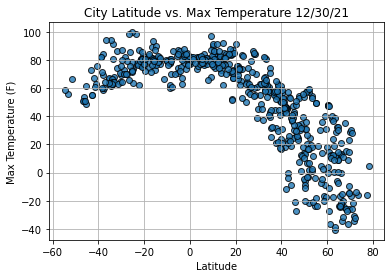

In [25]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

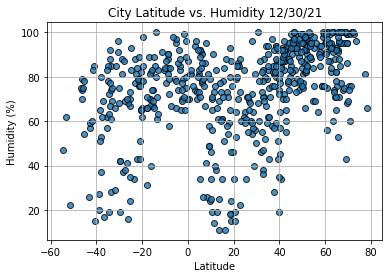

In [26]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

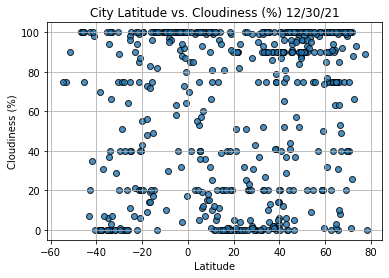

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

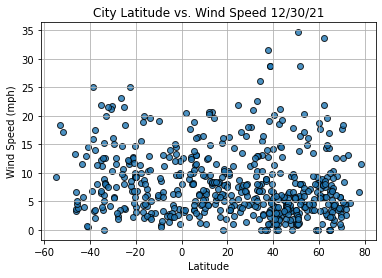

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()